<div><font face="Times New Roman" size=7><br><br>
<center>
Spectral Clustering
<center><br></div>

<font face="Arial" size=4><br>
    
One type of common methods for clustering are the <b>Spectral Clustering</b> methods.
<br><br>
Spectral Clustering is a type of clustering algorithm in machine learning that <b>uses eigenvectors of a similarity matrix</b> to divide a set of data points into clusters. The basic idea behind spectral clustering is to use the eigenvectors of the Laplacian matrix of a graph to represent the data points and find clusters by applying k-means or another clustering algorithm to the eigenvectors. <br><br>

Consider the matrix <b>$W$</b> representing the similarity of data points, where $(i,j)$ entry is non-zero if samples $(x^{(i)}, x^{(j)})$ are in the mutual KNN (k-nearest neighbors) of each other.<br><br>
    $$W_{ij} = \begin{cases}
    1, & x^{(i)} \in KNN \{x^{(j)}\} \hspace{3mm} AND \hspace{3mm} x^{(j)} \in KNN \{x^{(i)}\} \\
    0, & otherwise
    \end{cases}
    $$ <br><br>
    Another method to define <b>$W$</b> is to use a fully connected graph, where the value of its entries are obtained from a function which measures the similarity of these samples.<br><br>
    $$W_{ij} =  k(x^{(i)}, x^{(j)})$$ <br><br>
    where $k(x^{(i)}, x^{(j)})$ is a function to measure the similarity of two samples. An example of this function could be the <b>Radial Basis Function (RBF)</b>, defined as:
    $$k(x^{(i)}, x^{(j)}) = exp(-\gamma \lVert x^{(i)} - x^{(j)} \rVert)$$
   <br> We call matrix <b>$W$</b> the adjacency matrix. (There are other types of definitions for this matrix, like the $\epsilon$-neighborhood graph, simple KNN graph, etc.) <br><br>
    The degree of each vertex in the graph is defined as $g_i = \sum_{j}^{} w_{ij}$.
    Also, consider the diagonal matrix <b>$G$</b>, defined as: <br><br>
    $$G_{ij} = \begin{cases}
    g_i, & i=j \\
    0, & otherwise
    \end{cases}
    $$ <br><br>
    Now we are ready to define the <b>Laplacian</b> matrix <b>$L$</b>:
    $$L = G - W $$<br><br><br>
    It can be shown the eigenvectors of <b>$L$</b> corresponding to the 𝑚 smallest eigenvalues are appropriate for clustering. In other words, we first compute the 𝑚 smallest eigenvalues $\lambda_i$ and their corresponding eigenvectors $\phi_i$. Let $\Phi \in \mathbb{R} ^{p\times m}$ be a matrix consisting of $\{\phi_i\}_{i=1}^{m}$, i.e. the first(smallest)  eigenvectors of <b>$L$</b>:<br><br>
    $$\Phi(x^{(i)}) = [\phi_1(x^{(i)}), \phi_2(x^{(i)}), ..., \phi_m(x^{(i)})]^T \in \mathbb{R}^m$$ <br>
    In other words, we transform the original data $x^{(i)}$ from $\mathbb{R}^{p}$ to $\mathbb{R}^{m}$ through the first m eigenvectors of <b>$L$</b>: it is a nonlinear transformation. The $\it{i}$ th row of $\Phi$ represents the $\it{i}$ th data point in the new feature space. This step is also called Laplacian eigenmap, which is the key step in spectral clustering.
    <br><br> Now, in the final step, we need to apply K-means clustering to the rows of $\Phi$ to group the data into m clusters.

## Clustering
<font face="Arial" size=4>
Here we want to compare the results of spectral clustering to the typical K-Means clustering. Considering the following dataset:

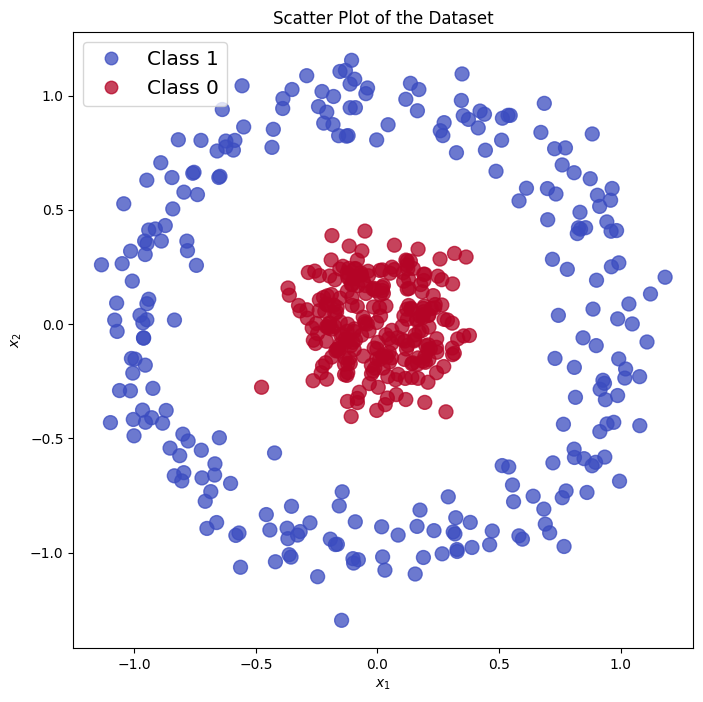

In [1]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt


X, labels = make_circles(500, factor=0.2, noise=0.1, random_state=1)

plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=labels, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the Dataset")
plt.show()

### Applying K-Measn with $k=2$

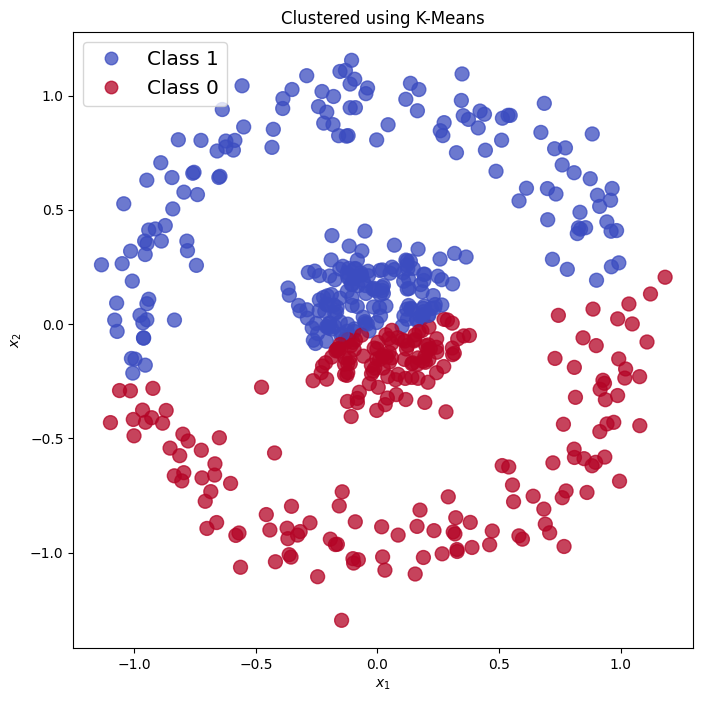

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(X)
new_labels = kmeans.labels_

plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=new_labels, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Clustered using K-Means")
plt.show()

As we can see K-Means can't properly cluster these data points. This is happening because there is no cluster center that can cover all data points in outter circle.

### Applying K-Nearest Neighbors

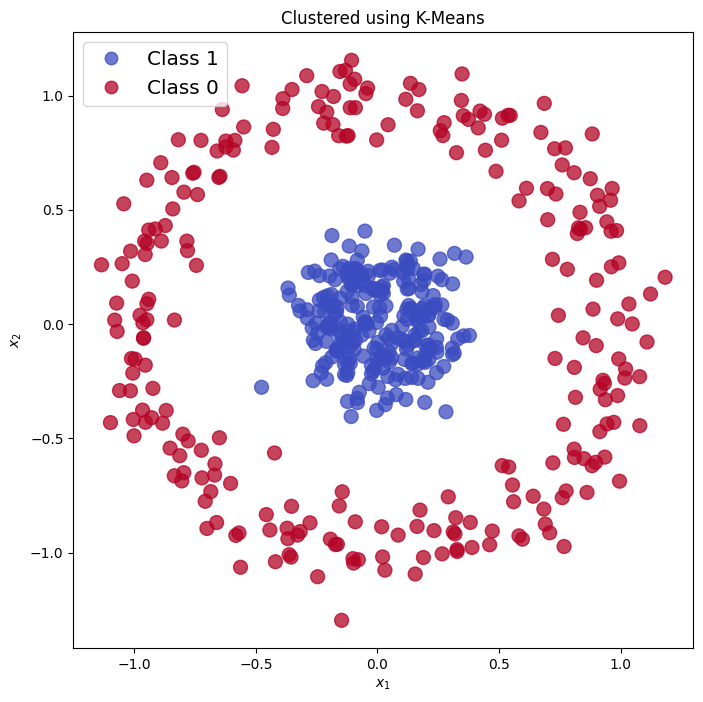

In [3]:
from sklearn.cluster import SpectralClustering

spec_cluster = SpectralClustering(n_clusters=2, n_init=10, random_state=0, affinity='nearest_neighbors')
spec_cluster.fit(X)
new_labels = spec_cluster.labels_

plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=new_labels, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Clustered using K-Means")
plt.show()

### Applying RBF

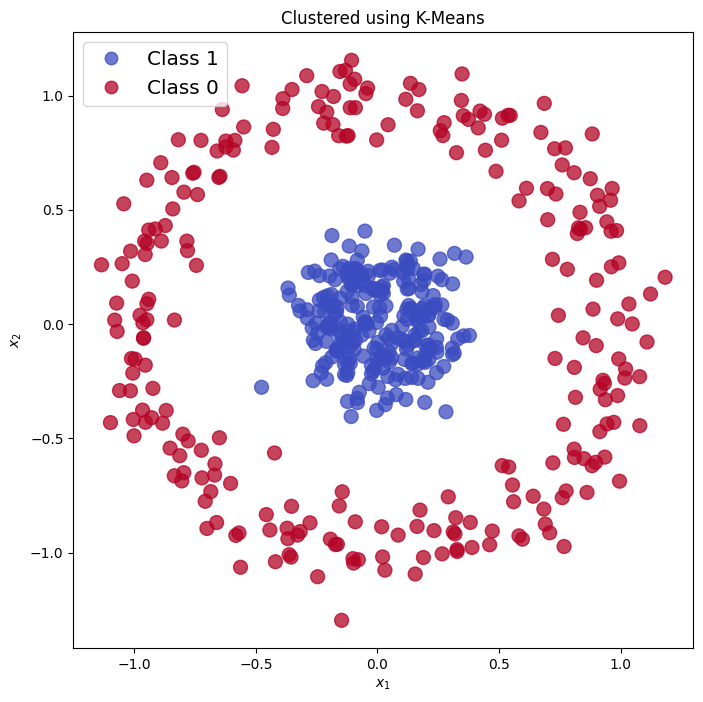

In [4]:
from sklearn.cluster import SpectralClustering

spec_cluster = SpectralClustering(n_clusters=2, n_init=10, random_state=0, affinity='rbf', gamma=10)
spec_cluster.fit(X)
new_labels = spec_cluster.labels_

plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=new_labels, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Clustered using K-Means")
plt.show()

### Comparison

K-Means failed to properly cluster the data. On the other hand, spectral clustering succesfully clustered the data. Both KNN and RBF have the same results but for rbf we need to set gamma, default gamma (1) can't cluster properly and has the same results as K-Means.

#### pros

<ul>
<li>Unlike K-Means we're not assuming clusters are spherical or round. This means the spectral clustering algorithm can perform well with a wide variety of shapes of data.</li>
<li>We can cluster even without actual data, just similarity matrix or even Laplacian. This helps to even cluster one dimentional data.</li>
</ul>

#### cons

<ul>
<li>Like K-Means we still need to know number of clusters (K).</li>
<li>Can be costly to compute.</li>
</ul>

# Clustering on Cancer Gene Expression RNA-seq dataset

This dataset is from the UCI Machine Learning repository. This collection of data is part of the RNA-Seq (HiSeq) PANCAN data set. It is a random extraction of gene expressions of patients having different types of tumor: 
    
BRCA (breast invasive carcinoma) <br>
KIRC (kidney renal clear cell carcinoma) <br>
COAD (colon adenocarcinoma) <br>
LUAD (lung adenocarcinoma) <br>
PRAD (prostate adenocarcinoma) <br> <br>
    
There are 801 instances with 20531 attributes, which are the gene expressions among different patients with each of this tumors. The data can be downloaded here: https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

In [5]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00401/TCGA-PANCAN-HiSeq-801x20531.tar.gz
!tar -xf TCGA-PANCAN-HiSeq-801x20531.tar.gz --strip-components 1

--2023-04-08 17:46:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/00401/TCGA-PANCAN-HiSeq-801x20531.tar.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72856320 (69M) [application/x-httpd-php]
Saving to: ‘TCGA-PANCAN-HiSeq-801x20531.tar.gz.1’

TCGA-PANCAN-HiSeq-8 100%[===================>]  69.48M  35.4MB/s    in 2.0s    

2023-04-08 17:46:57 (35.4 MB/s) - ‘TCGA-PANCAN-HiSeq-801x20531.tar.gz.1’ saved [72856320/72856320]



In [6]:
from sklearn.cluster import SpectralClustering
import pandas as pd

data = pd.read_csv('./data.csv')
labels = pd.read_csv('./labels.csv')
print(data.head())
print(labels.head())
data = data.iloc[:, 1:]
labels = labels.iloc[:, 1:]

  Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   

     gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
0  7.175175  0.591871     0.0  ...    4.926711    8.210257    9.723516   
1  6.816049  0.000000     0.0  ...    4.593372    7.323865    9.740931   
2  6.972130  0.452595     0.0  ...    5.125213    8.127123   10.908640   
3  7.843375  0.434882     0.0  ...    6.076566    8.792959   10.141520   
4  6.566967  0.360982     0.0  ...    5.996032    8.891425   10.373790   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0    7.220030    9.119813   12.003135  

In [7]:
import numpy as np

print('Missing data count: ', data.isnull().values.sum())
print('Number of clusters: ', np.unique(labels).size)

Missing data count:  0
Number of clusters:  5


In [8]:
spec_clustering = SpectralClustering(n_clusters=5, n_init=10, random_state=0, affinity='nearest_neighbors')
spec_clustering.fit(data.iloc[:, 1:])
pred_labels = spec_clustering.labels_

### Evaluation of Clustering Algorithm

#### ARI

Rand index is comparing one classifcation result to an another classification result by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings. With confusion matrix we can say that: <br><br>
$RI=\frac{TP+TN}{TP+FP+TN+FN}$<br><br>
The adjusted Rand index ensure to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical.<br><br>
$ARI=\frac{RI-E[ RI]}{max( RI) -E[ RI]}$

In [9]:
from sklearn.metrics.cluster import adjusted_rand_score

mapper = {'PRAD':0, 'LUAD':2, 'BRCA':1, 'KIRC':3, 'COAD':4}
labels = labels.replace(mapper)

adjusted_rand_score(labels['Class'], pred_labels)

0.9962578040012737

#### NMI

Information shared between two random variables, 0 means two variables are independent and higher values mean two variables share more information. Unlike Correlation Coefficient possible values are not bound to [0, 1] interval.<br>
Normilized Mutual Information tries to bring the possible values to bounded range [0, m].

In [10]:
from sklearn.metrics.cluster import normalized_mutual_info_score

normalized_mutual_info_score(labels['Class'], pred_labels)

0.9947747622537488

### Visualization

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
new_data = tsne.fit_transform(data)
new_data

array([[ -0.0713671, -39.3282   ],
       [ 12.881719 ,  18.755415 ],
       [ -6.40275  , -35.34675  ],
       ...,
       [ -6.7745166,  38.990593 ],
       [ -1.2049971, -36.30285  ],
       [  2.0409698, -30.67473  ]], dtype=float32)

Text(0.5, 1.0, 'Preicted classes')

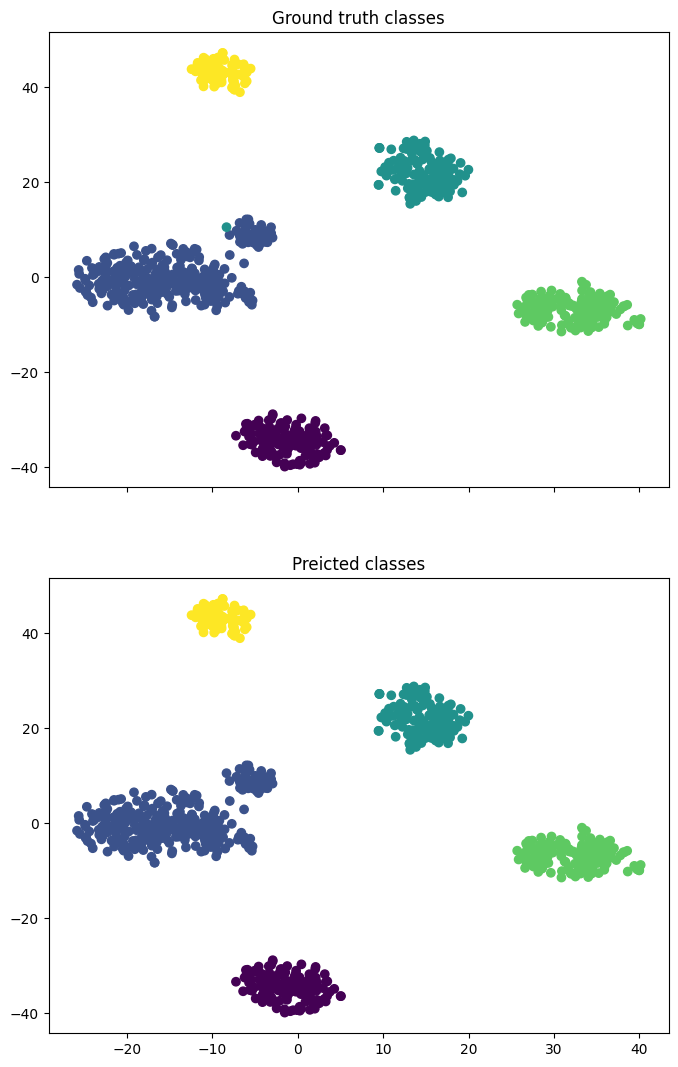

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(8,13))
ax1.scatter(new_data[:, 0], new_data[:, 1], c=labels['Class'])
ax1.set_title('Ground truth classes')
ax2.scatter(new_data[:, 0], new_data[:, 1], c=pred_labels)
ax2.set_title('Preicted classes')

As we can see there's only one miss classified data and probably it's an outlier.